# 🧍‍♂️🧍‍♀️ Customer Behavior Analysis

## 🎯 Objectives

This notebook explores customer behavior patterns in the e-commerce dataset. The main goals are to:

- Identify who spends more: men or women.
- Analyze which age groups spend or buy the most.
- Explore buying frequency and recency.
- Examine product category preferences by gender and age.
- Understand regional buying patterns.
- Assess if shipping outcomes impact customer behavior.

## 📦 Data Source


The data used here is the cleaned version of the original sales dataset:
- File: `../data/cleaned_orders.csv`
- Format: CSV
- Rows represent individual product orders with associated customer and order details.

## 📊 Data Loading

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("../data/cleaned_orders.csv")
df.shape
# df.info()

(810, 18)

In [7]:
# Check for nulls
# df.isna().sum()

## Analysis

In this section, different aspects of the data would be considered, showcasing orders and revenues are affected by customer behaviour, demographics, as well as shipping prices.

### 📊 1. Spending Patterns by Gender

#### Total Amounts Spent

Text(0, 0.5, 'Total Amount Spent GHS')

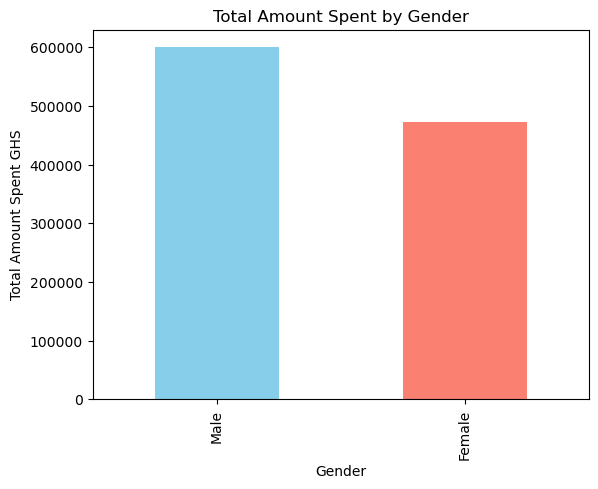

In [25]:
# Graph of total amount calc vs gender
df_total_by_gender = df.groupby("Gender")["Total Price Calc"].sum().sort_values(ascending=False)
df_total_by_gender.plot(kind="bar", color=['skyblue', 'salmon']);
plt.title("Total Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent GHS")

It appears `Male`s spend more than `Female`s. Let's consider different aspects of their spending, and see if this still confirms the above observation.

#### Average Spending Per Order

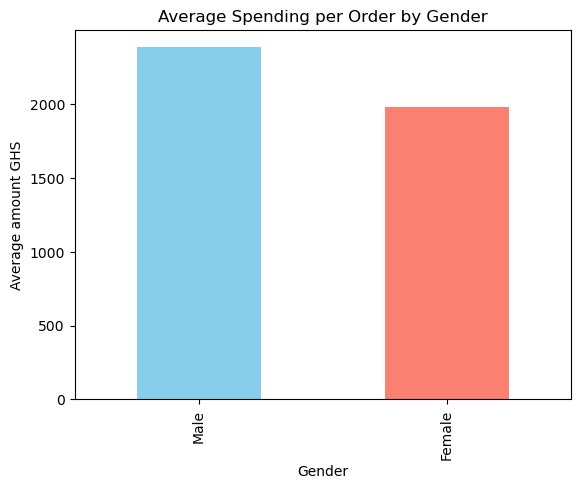

In [41]:
# Average spending per order

# Get order totals on each day for each customer
df_order_totals = df.groupby(["Order Date", "Gender"])["Total Price Calc"].sum().reset_index()

# Obtain average by `Gender`
df_avg_spend =  df_order_totals.groupby("Gender")["Total Price Calc"].mean().sort_values(ascending=False)

# Bar plot of the data
df_avg_spend.plot(kind="bar", color=['skyblue', 'salmon'])
plt.title("Average Spending per Order by Gender")
plt.ylabel("Average amount GHS")
plt.xlabel("Gender")
plt.show()


#### Spendings by Category and by Gender

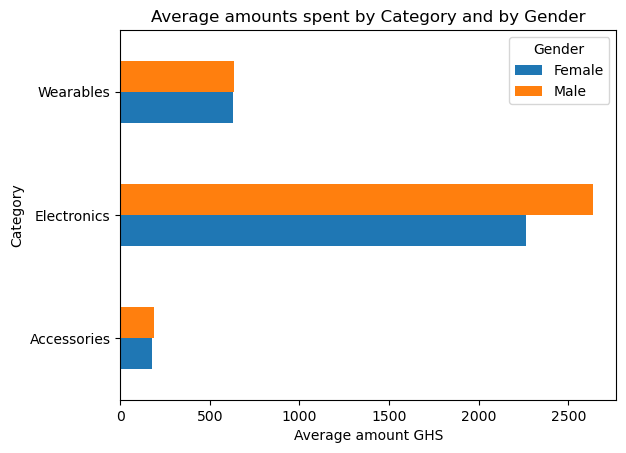

In [ ]:
# Purchasing Trends Over Categories

# Group orders by `Category` and `Gender`
df_gender_by_cat = df.groupby(["Category", "Gender"])["Total Price Calc"].mean().sort_values(ascending=False).unstack()

# Plot graph
df_gender_by_cat.plot(kind="barh")
plt.title("Average amounts spent by Category and by Gender")
plt.xlabel("Average amount GHS")
plt.ylabel("Category")
plt.show()

The above visualizations suggest that the major difference in spending btn Males and Females come from the `Electronics` product category. We dive into this to inspect more differences between the genders.

#### Deep dive into `Electronics` category

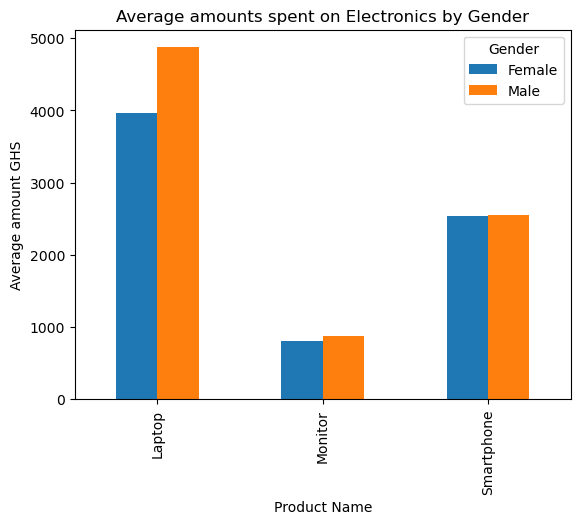

In [13]:
# Diving deeper into the electronics
df_electronics = df[df["Category"] == "Electronics"]
electronics_categories = df_electronics.groupby(by=["Product Name", "Gender"])["Total Price Calc"].mean().sort_values(ascending=False).unstack()
electronics_categories.plot(kind="bar")
plt.title("Average amounts spent on Electronics by Gender")
plt.ylabel("Average amount GHS")
plt.xlabel("Product Name")
plt.show()

#### Conclusion

The spending patterns for both `Male`s and `Female`s were generally alike. However, the main difference in amount spent driven mainly by the `Electronics` category with Males spending more than Females. Males spent over `23%` on average more than females, suggesting preference for computing devices among Male customers.

### 📊 2. Spending Patterns by Age Group

#### Total Average Spending by Age Group

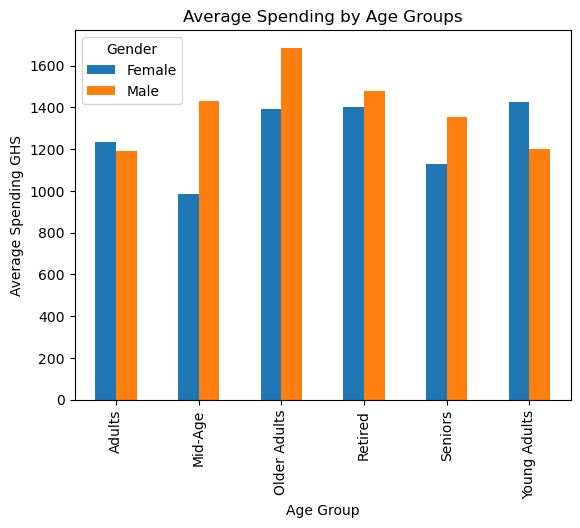

In [ ]:
avg_by_age_group = df.groupby(["Age Group", "Gender"])["Total Price Calc"].mean().unstack()
avg_by_age_group.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Average Spending GHS")
plt.title("Average Spending by Age Groups")
plt.show()

Males consistently have higher average spending, except for the age groups `Adults` and `Young Adults` where females have higher spendings. `Mid-Age` shows a considerable gap between Males and Females

#### Deep dive into Adults and Young Adults groups

#### Deep dive into Mid-Age, Older Adults

#### Total Spending per order

<Axes: xlabel='Order Month'>

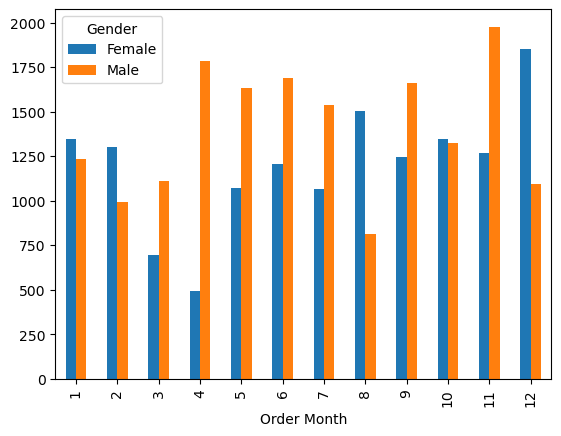

In [31]:
fields= ["Order Date",  "Gender", "Shipping Fee", "Total Price Calc", "Order Month"]
spo = df[fields].copy()
spo["Total"] = spo["Total Price Calc"] + spo["Shipping Fee"]

# Obtain average spending per order by Gender
avg_spo = spo.groupby(["Order Month", "Gender"])["Total"].mean().unstack()
# .set_index("Order Month")
avg_spo.head()
avg_spo.plot(kind="bar")


Males typically spend more per order than Females especially during the middle of the year and in November. Females spend more than males in December and the first two months of every new year. We dive deeper into these trends to unlock more insights. 

#### Spendings in December, January and February

In [ ]:
# Obtain info for December, January and February
mask_month = df["Order Month"].isin([1,2,12]) 
mask_gender = df["Gender"] == "Female"
dec_jan_feb = df[mask_month & mask_gender].sort_values(by="Order Month", ascending=True)

### 📊 3. Category Preferences by Gender & Age

### 📊 4. Frequency & Recency

### 📊 5. Region-Based Insights

### 📊 6. Shipping Status vs Customer Spend

## 📌Summary of Insights

## 📝 Usage Information

This notebook is open for educational and non-commercial use.
Feel free to reuse, modify, or reference this work as part of your learning or projects.